# Proyecto final de la Primera Evaluación
Este proyecto tiene como finalidad el entrenamiento y configuración de un modelo de Regresión Lineal simple y múltiple.

In [56]:
import pandas as pd
import numpy as np

from seaborn import FacetGrid, scatterplot, histplot, boxplot
import matplotlib.pyplot as plt

In [57]:
path = '../data/datains_e.xlsx'
df = pd.read_excel(path)

## Estudio estructural de la base de datos 
Voy a utilizar un par de métodos de la librería `pandas` que me permitan observar la estructura de los datos dentro de la base de datos importada. 

*Inciso*:
Debemos eliminar la variable **index** del DataFrame puesto que no va a ser utilizada. Lo podemos hacer con la función `drop()`.

In [59]:
df = df.drop(labels='index', axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       196 non-null    float64
 1   sex       198 non-null    object 
 2   bmi       196 non-null    float64
 3   children  199 non-null    float64
 4   smoker    197 non-null    object 
 5   region    200 non-null    object 
 6   charges   200 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.1+ KB


### Análisis
Como se puede observar, contamos con **7 columnas** en una tabla con un total de **200 registros**.

**4** de las 7 columnas (`age`, `sex`, `bmi`, `children`, `smoker`) cuentan **valores nulos** que deberemos tratar más adelante.

Como indica `dtypes` en el informe, contamos con **4 variables númericas** y **3 variables categóricas** que tendremos que codificar posteriormente para estudiar su correlación con el **target**. 

En este caso, nuestra **variable objetivo o target** es el importe del seguro (`charge`) que depende del resto de variables; las **features o variables objetivo**.

Ahora, voy a obsevar también algunas **medidas estadísticas** que serán útiles a la hora de hacer el **escalado de valores**.

In [55]:
# Tabla con medidas estadísticas básicas para cada variable numérica
df.describe()

,age,bmi,children,charges
count,196.000000,196.000000,199.000000,200.000000
mean,39.948980,32.417857,1.075377,13790.512035
std,13.752294,22.629577,1.118868,12195.955051
min,18.000000,16.815000,0.000000,1121.873900
25%,27.750000,26.407500,0.000000,5451.159125
50%,40.000000,30.800000,1.000000,9526.937700
75%,51.000000,34.900000,2.000000,17610.229900
max,64.000000,334.700000,5.000000,52590.829390


## EDA (Análisis Exploratorio de Datos) 
Una vez estudiada la estrucutra básica de los datos, debemos realizar el EDA. Este proceso va a consistir en los siguientes pasos:
- Análisis descriptivo
- Codificación de variables categóricas
- Identificación y tratamiento de valores nulos -> **valores NaN**
- Identificación y tratamiento de valores atípicos -> **outliers**
- Estudio de correlación entre las variables de la base de datos.

### Análisis descriptivo
En este proceso, voy a obsevar la **distribución de los datos** utilizando los **histogramas** y también su **concentración** a través de **diagramass de caja y bigote**. 
Para ello, voy a utilizar las funciones `histplot` y `boxplot` de la librería `seaborn`.

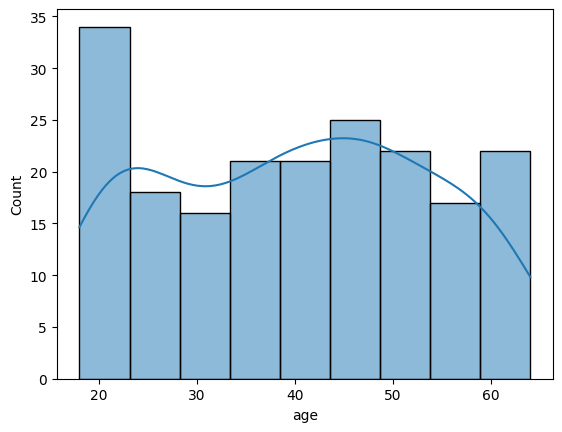

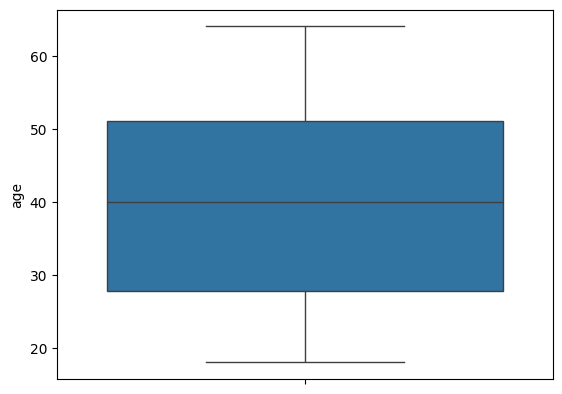

In [63]:
# Para la variable 'age'
col = 'age'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'age'**, los datos están basatante concetrados como muestran ambos gráficos. También se puede observar la ausencia de **outliers** y cierta asimetría en la distribución de los datos, pero sin presencia de un sesgo aparente.

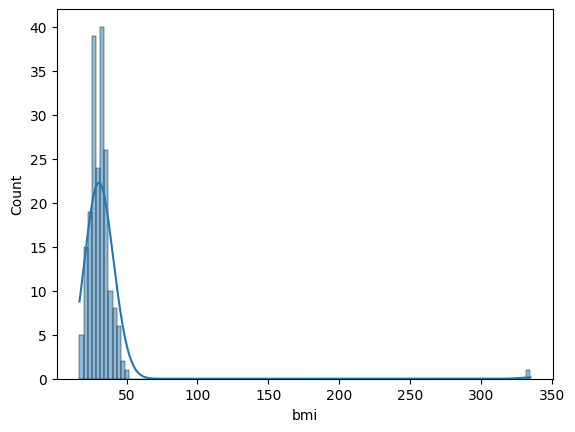

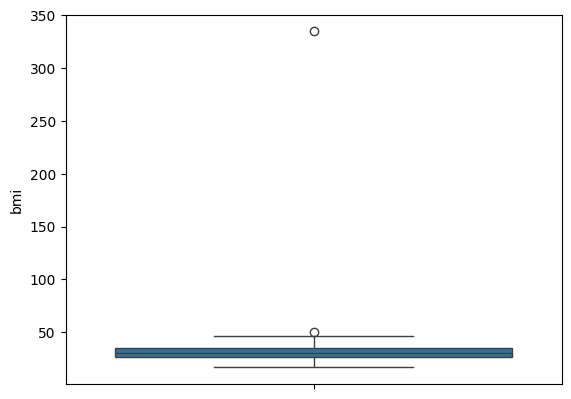

In [64]:
# Para la variable 'bmi'
col = 'bmi'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'bmi'**, la presencia de **outliers** es claramente notable.